# Multivariate-linear-regression

Multivariate regression for HR department to predict salaries for fututre candidates.Experience of candidate,written test score and personal interview score are 3 factors that HR will decide the salary.

In [1]:
#importing models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("Multiple linear regression.csv")

In [3]:
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [4]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [5]:
experience=df.experience.map({"one":1,"two":2,"three":3,"four":4,"five":5,"six":6,"seven":7,"eight":8,"nine":9,"ten":10,"eleven":11,"twelve":12})

In [6]:
df['experience']=experience

In [7]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,NaN,7,72000
7,11.0,7.0,8,80000


In [8]:
df.experience.fillna(0,inplace=True)

In [9]:
df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].mean(),inplace=True)

In [10]:
df.corr()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
experience,1.000000,-0.241897,-0.29048,0.908017
test_score(out of 10),-0.241897,1.000000,0.13971,-0.002850
interview_score(out of 10),-0.290480,0.139710,1.00000,0.037820
salary($),0.908017,-0.002850,0.03782,1.000000


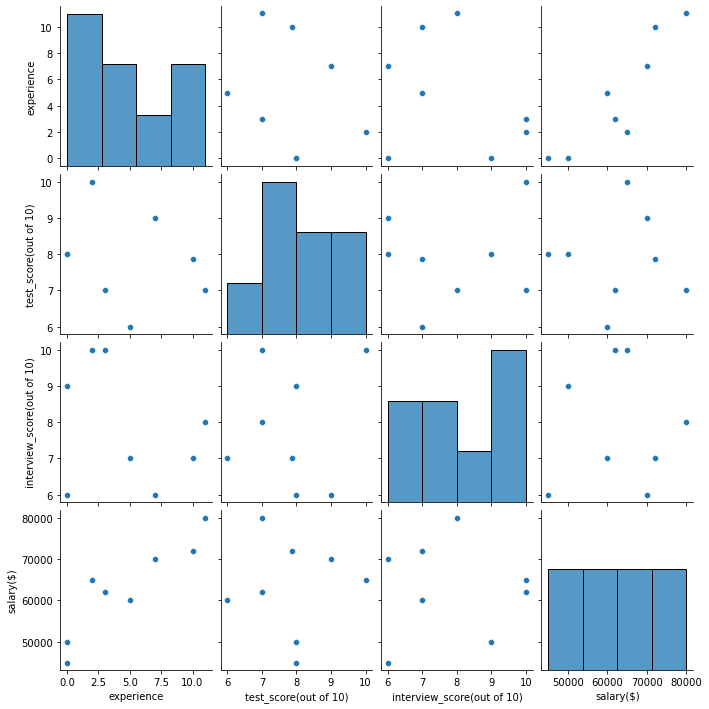

In [11]:
sns.pairplot(df)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [13]:
reg=LinearRegression(normalize=True)

In [14]:
X=df.drop('salary($)',axis=1)
X

,experience,test_score(out of 10),interview_score(out of 10)
0,0.0,8.000000,9
1,0.0,8.000000,6
2,5.0,6.000000,7
3,2.0,10.000000,10
4,7.0,9.000000,6
5,3.0,7.000000,10
6,10.0,7.857143,7
7,11.0,7.000000,8


In [15]:
y=df['salary($)']

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=56,test_size=0.3)

In [17]:
reg.fit(X_train,y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [20]:
y_predt=reg.predict(X_train)


In [21]:
r2_score(y_train,y_predt)

0.9969771428698323

In [22]:
y_pred=reg.predict(X_test)

In [23]:
r2_score(y_test,y_pred)

0.7581817460249511

In [25]:
reg.predict([[2,9,6]])

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([51380.28597505])

2 yr experience, 9 test score, 6 interview score

12 yr experience, 10 test score, 10 interview score

In [27]:
reg.predict([[12,10,10]])

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([102400.06084576])